# Impact of parameters

In [2]:
from hestonpy.models.heston import Heston
from hestonpy.models.calibration.volatilitySmile import VolatilitySmile, fontdict

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

What is the impact of each parameters on the calibrated smile ?

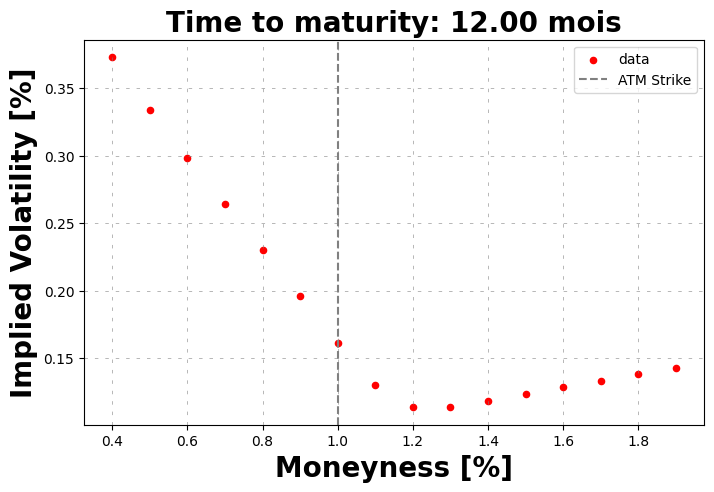

In [3]:
# Paramètres initiaux du modèle Heston
spot = 100            # Prix spot
vol_initial = 0.02    # Variance initiale
r = 0.00
params = {
    "kappa": 1.25,
    "theta": 0.06,
    "drift_emm": 0.00,
    "sigma": 0.6,
    "rho": -0.8,
}
time_to_maturity = 1
model = Heston(spot, vol_initial, r, **params)

strikes = np.arange(40, 200, 10)
prices = model.call_price(strike=strikes, time_to_maturity=time_to_maturity)

smile = VolatilitySmile(strikes=strikes, time_to_maturity=1, atm=spot, market_prices=prices)
smile.plot()

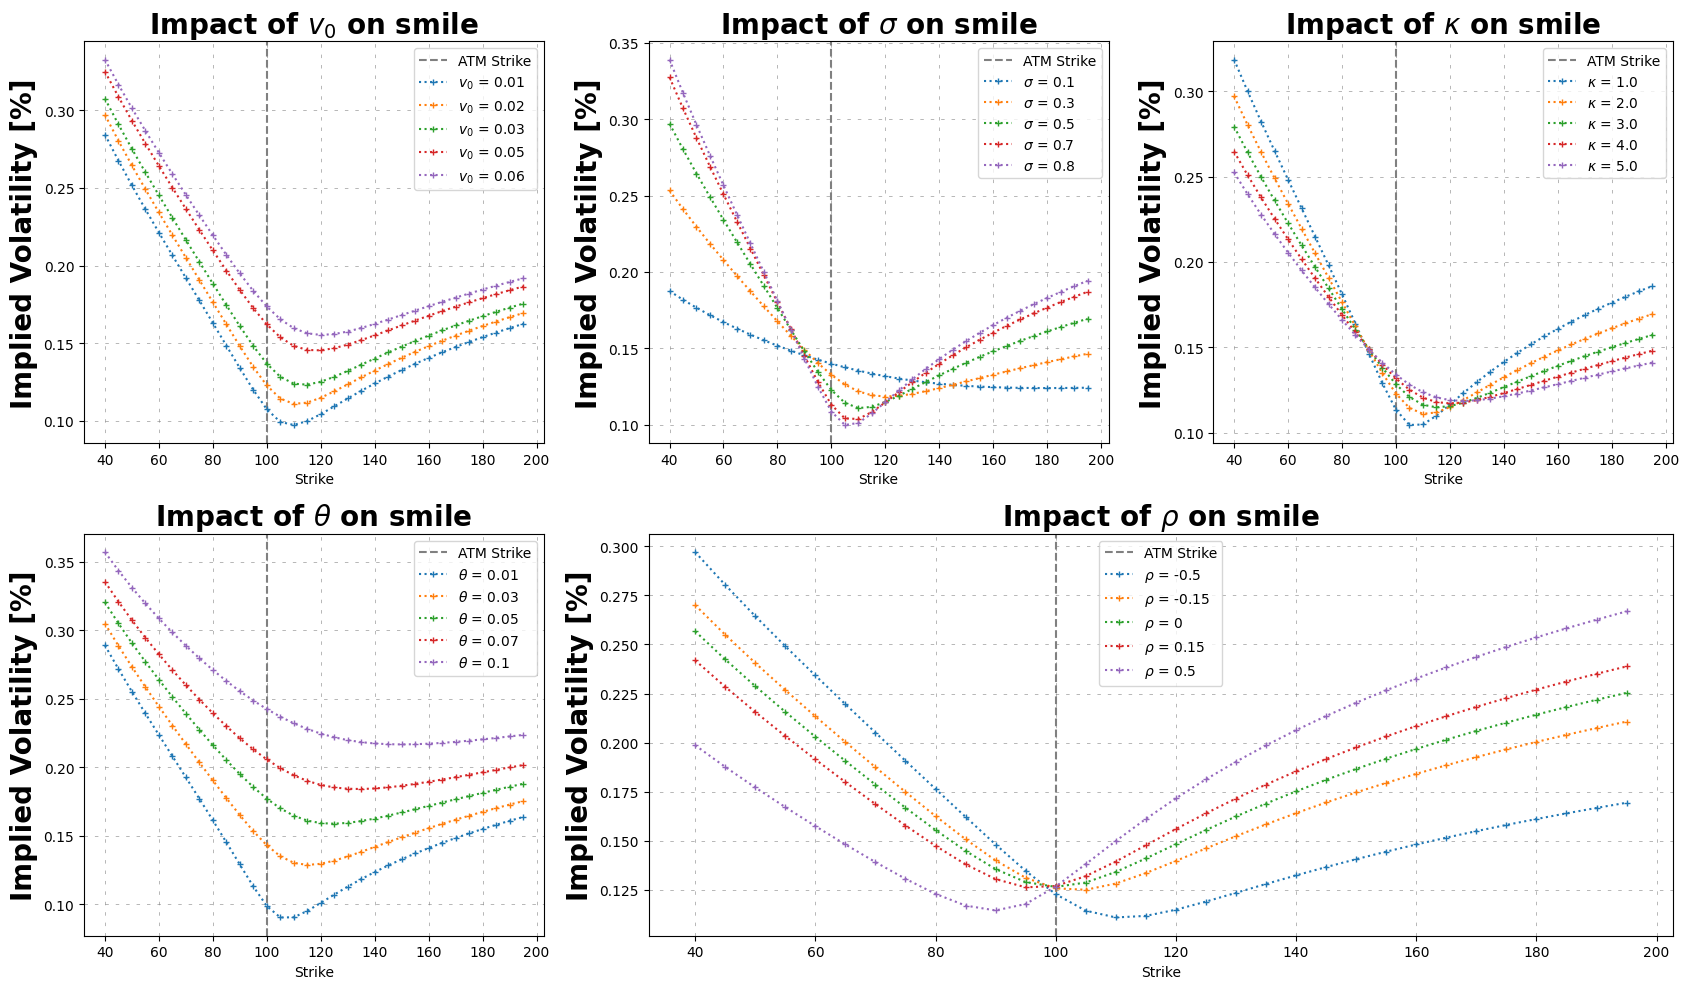

In [4]:
# Paramètres de base du modèle Heston
base_params = {
    "vol_initial": 0.02,   # Variance initiale
    "kappa": 2.0,          # Vitesse de réversion
    "theta": 0.02,         # Variance à long terme
    "sigma": 0.5,          # Volatilité de la variance
    "rho": -0.5,           # Corrélation
}

# Définition des paramètres à tester
params_to_test = {
    "vol_initial": [0.01, 0.02, 0.03, 0.05, 0.06],
    "sigma": [0.1, 0.3, 0.5, 0.7, 0.8],
    "kappa": [1.0, 2.0, 3.0, 4.0, 5.0],
    "theta": [0.01, 0.03, 0.05, 0.07, 0.10],
    "rho": [-0.5, -0.15, 0, 0.15, 0.5],
}

# Dictionnaire pour convertir les noms en LaTex
latex_labels = {
    "vol_initial": r"$v_0$",
    "sigma": r"$\sigma$",
    "kappa": r"$\kappa$",
    "theta": r"$\theta$",
    "rho": r"$\rho$",
}

strikes = np.arange(40, 200, 5)


fig = plt.figure(figsize=(17, 10))
gs = gridspec.GridSpec(2, 3, figure=fig)

axes = [fig.add_subplot(gs[0, i]) for i in range(3)]  # Première ligne
axes.append(fig.add_subplot(gs[1, 0]))  # En bas à gauche
axes.append(fig.add_subplot(gs[1, 1:]))  # Fusion des deux derniers

# Fonction pour tracer les volatility smiles
def plot_vol_smile(ax, param_name, param_values):
    ax.axvline(spot, linestyle="--", color="gray", label="ATM Strike")
    
    for value in param_values:
        params = base_params.copy()
        params[param_name] = value

        model = Heston(spot=spot, r=r, drift_emm=0, **params)
        prices = model.call_price(strike=strikes, time_to_maturity=1)
        smile = VolatilitySmile(strikes=strikes, atm=spot, market_prices=prices, time_to_maturity=1)
        implied_vols = smile.compute_smile(prices)
        
        ax.plot(strikes, implied_vols, label=f'{latex_labels[param_name]} = {value}', marker='+', linestyle="dotted", markersize=4)
    
    ax.set_title(f"Impact of {latex_labels[param_name]} on smile", fontdict=fontdict)
    ax.set_xlabel("Strike")
    ax.set_ylabel("Implied Volatility [%]", fontdict=fontdict)
    ax.grid(visible=True, which="major", linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5, alpha=0.8)
    ax.legend()

# Tracer les courbes sur chaque subplot
for i, (param_name, param_values) in enumerate(params_to_test.items()):
    plot_vol_smile(axes[i], param_name, param_values)

plt.tight_layout()
plt.show()